### 摘要

* pandas 简要入门
    1. 对象创建
    2. 数据视图
    3. 索引切片
       * 通过标签
       * 通过为止
       * 布尔索引
    4. 缺失数据
    5. 操作
    6. 合并
    7. 分组
    8. reshape
    9. 数据读入读出
    
这里我们主要通过pandas官方文档[10 Minutes to pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html)讲解pandas基础

中文翻译文档[十分钟搞定pandas](http://www.cnblogs.com/chaosimple/p/4153083.html)


In [2]:
#首先当然是导入我们需要的包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#为了更好看，我们选择ggplot样式
import matplotlib
matplotlib.style.use('ggplot')

### 对象创建

* Series 

Series有点类似numpy里面的一维数组

In [43]:
#创建一个Series
s  = pd.Series([1,3,5,np.nan,6,8])
#print s

n1 = np.array(list("ABCDEFG"))
#print n1

s2 = pd.Series(n1)
#print s2

lis = list("ABCDEFG")
s3 = pd.Series(lis)
#print s3

s4 = pd.Series(list("ABCDEFG"),index=[11,21,31,41,51,61,71])
print s4
print s4[11]

11    A
21    B
31    C
41    D
51    E
61    F
71    G
dtype: object
A


* DataFrame

DataFrame 有点类似数据库里面的表table

In [3]:
#创建一个DataFrame
dates = pd.date_range("20160412",periods=6)
dates
print dates
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list("ABCD"))
#df
#df = pd.DataFrame(np.random.randn(5,5),index=list("12345"),columns=list("ABCDE"))
#df
df

DatetimeIndex(['2016-04-12', '2016-04-13', '2016-04-14', '2016-04-15',
               '2016-04-16', '2016-04-17'],
              dtype='datetime64[ns]', freq='D')


,A,B,C,D
2016-04-12,-0.352075,0.792117,-0.478669,0.705107
2016-04-13,-0.395491,0.760144,-0.109512,-0.386012
2016-04-14,0.127280,0.021084,3.087900,1.133400
2016-04-15,-1.100870,-0.071101,-0.243060,-0.190100
2016-04-16,0.421173,-1.002471,-0.139795,-0.467803
2016-04-17,0.513706,-0.660055,-1.638824,0.508767


In [46]:
df2 = pd.DataFrame({"A":1,
                    "B":pd.Timestamp("20160412"),
                    "C":pd.Series(1,index=list(range(4)),dtype="float32"),
                    "D":np.array([3]*4,dtype="int32"),
                    "E":pd.Categorical(["text","train","text","train"]),
                    "F":"foo"})
df2

,A,B,C,D,E,F
0,1,2016-04-12,1,3,text,foo
1,1,2016-04-12,1,3,train,foo
2,1,2016-04-12,1,3,text,foo
3,1,2016-04-12,1,3,train,foo


In [47]:
df2.dtypes

A             int64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [48]:
#使用tab补全
#df2.<TAB>
df2.

0    1
1    1
2    1
3    1
Name: A, dtype: int64

### 查看数据

In [50]:
#head，tail默认查看5条数据
print df
df.head(2)

                   A         B         C         D
2016-04-12 -1.554724 -0.410271  2.642086  0.669351
2016-04-13 -0.059116 -0.505077  0.171248 -1.093928
2016-04-14 -0.489809  1.896279  0.862216  1.049714
2016-04-15  0.638732  0.727150  1.561333 -1.571183
2016-04-16 -0.083850  1.590114  0.579363  1.656634
2016-04-17  1.185765 -0.876440 -2.517277 -0.530999


,A,B,C,D
2016-04-12,-1.554724,-0.410271,2.642086,0.669351
2016-04-13,-0.059116,-0.505077,0.171248,-1.093928


In [16]:
df.tail(3)

,1,2,3,4,5
3,-0.115293,-0.375435,0.828214,-0.286124,-0.047644
4,-0.153121,-0.419129,0.469492,-0.525162,1.968026
5,-0.661572,0.592646,0.033026,0.127838,-0.239606


In [51]:
#查看索引，字段
df.index

DatetimeIndex(['2016-04-12', '2016-04-13', '2016-04-14', '2016-04-15',
               '2016-04-16', '2016-04-17'],
              dtype='datetime64[ns]', freq='D')

In [52]:
df.columns

Index([u'A', u'B', u'C', u'D'], dtype='object')

In [53]:
df.values

array([[-1.55472393, -0.41027057,  2.64208558,  0.66935141],
       [-0.05911559, -0.50507691,  0.17124838, -1.09392762],
       [-0.48980879,  1.8962794 ,  0.86221635,  1.04971405],
       [ 0.63873237,  0.72714973,  1.56133272, -1.57118297],
       [-0.08385024,  1.5901145 ,  0.57936327,  1.65663434],
       [ 1.18576481, -0.87643989, -2.51727748, -0.53099877]])

In [20]:
#查看数据的一些简单统计结果
df.describe()

,1,2,3,4,5
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.114031,0.312457,0.495302,-0.238638,0.519303
std,0.898314,0.838444,0.354527,0.676819,1.315448
min,-0.661572,-0.419129,0.033026,-1.152965,-0.941754
25%,-0.170051,-0.375435,0.285208,-0.525162,-0.239606
50%,-0.153121,0.148600,0.469492,-0.286124,-0.047644
75%,-0.115293,0.592646,0.828214,0.127838,1.857494
max,1.670195,1.615601,0.860572,0.643226,1.968026


In [54]:
#数据结构置换
df.T

,2016-04-12 00:00:00,2016-04-13 00:00:00,2016-04-14 00:00:00,2016-04-15 00:00:00,2016-04-16 00:00:00,2016-04-17 00:00:00
A,-1.554724,-0.059116,-0.489809,0.638732,-0.083850,1.185765
B,-0.410271,-0.505077,1.896279,0.727150,1.590114,-0.876440
C,2.642086,0.171248,0.862216,1.561333,0.579363,-2.517277
D,0.669351,-1.093928,1.049714,-1.571183,1.656634,-0.530999


In [56]:
#按值排序
print df
df.sort_values(by="A")

                   A         B         C         D
2016-04-12 -1.554724 -0.410271  2.642086  0.669351
2016-04-13 -0.059116 -0.505077  0.171248 -1.093928
2016-04-14 -0.489809  1.896279  0.862216  1.049714
2016-04-15  0.638732  0.727150  1.561333 -1.571183
2016-04-16 -0.083850  1.590114  0.579363  1.656634
2016-04-17  1.185765 -0.876440 -2.517277 -0.530999


,A,B,C,D
2016-04-12,-1.554724,-0.410271,2.642086,0.669351
2016-04-14,-0.489809,1.896279,0.862216,1.049714
2016-04-16,-0.083850,1.590114,0.579363,1.656634
2016-04-13,-0.059116,-0.505077,0.171248,-1.093928
2016-04-15,0.638732,0.727150,1.561333,-1.571183
2016-04-17,1.185765,-0.876440,-2.517277,-0.530999


### 选择
> 注:尽管使用python或者numpy表达式选择，设置是符合直觉和容易上手，但是pandas推荐使用经过优化的pandas数据访问方法.at,.iat,.loc,iloc以及.ix

In [59]:
#df[A] == df.A
print df
#df["A"]
df.A

                   A         B         C         D
2016-04-12 -1.554724 -0.410271  2.642086  0.669351
2016-04-13 -0.059116 -0.505077  0.171248 -1.093928
2016-04-14 -0.489809  1.896279  0.862216  1.049714
2016-04-15  0.638732  0.727150  1.561333 -1.571183
2016-04-16 -0.083850  1.590114  0.579363  1.656634
2016-04-17  1.185765 -0.876440 -2.517277 -0.530999


2016-04-12   -1.554724
2016-04-13   -0.059116
2016-04-14   -0.489809
2016-04-15    0.638732
2016-04-16   -0.083850
2016-04-17    1.185765
Freq: D, Name: A, dtype: float64

In [60]:
#切片
df[0:3]

,A,B,C,D
2016-04-12,-1.554724,-0.410271,2.642086,0.669351
2016-04-13,-0.059116,-0.505077,0.171248,-1.093928
2016-04-14,-0.489809,1.896279,0.862216,1.049714


In [35]:
df["20160412":"20160414"]

,A,B,C,D
2016-04-12,0.722894,0.644555,-0.377230,0.933034
2016-04-13,0.086092,1.015555,0.473564,-1.242422
2016-04-14,1.021846,-0.636046,1.814778,-1.248404


#### 通过标签选择
.loc的切片更加严格，比如下面是不允许的

In [36]:
df.loc[2:3]

TypeError: cannot do slice indexing on <class 'pandas.tseries.index.DatetimeIndex'> with these indexers [2] of <type 'int'>

In [64]:
print df.index
df.loc["2016-04-12"]
print df

DatetimeIndex(['2016-04-12', '2016-04-13', '2016-04-14', '2016-04-15',
               '2016-04-16', '2016-04-17'],
              dtype='datetime64[ns]', freq='D')
                   A         B         C         D
2016-04-12 -1.554724 -0.410271  2.642086  0.669351
2016-04-13 -0.059116 -0.505077  0.171248 -1.093928
2016-04-14 -0.489809  1.896279  0.862216  1.049714
2016-04-15  0.638732  0.727150  1.561333 -1.571183
2016-04-16 -0.083850  1.590114  0.579363  1.656634
2016-04-17  1.185765 -0.876440 -2.517277 -0.530999


In [66]:
#通过标签多轴选择
df.loc[:]
df.loc[:,["A","C"]]

,A,C
2016-04-12,-1.554724,2.642086
2016-04-13,-0.059116,0.171248
2016-04-14,-0.489809,0.862216
2016-04-15,0.638732,1.561333
2016-04-16,-0.083850,0.579363
2016-04-17,1.185765,-2.517277


In [44]:
#这里不像列表不包括终点！！！
df.loc["20160412":"20160414",["A","B"]]

,A,B
2016-04-12,1.494035,-0.249508
2016-04-13,0.150298,-0.972742
2016-04-14,0.438359,0.888426


#### 通过位置(Postion)选择

In [45]:
df.iloc[3]

A    0.496325
B    0.238735
C    0.097390
D    0.886351
Name: 2016-04-15 00:00:00, dtype: float64

In [67]:
df.iloc[3:5,0:4:2]

,A,C
2016-04-15,0.638732,1.561333
2016-04-16,-0.083850,0.579363


In [47]:
df.iloc[[1,2,4],[0,2]]

,A,C
2016-04-13,0.150298,-1.182513
2016-04-14,0.438359,-0.568706
2016-04-16,-0.388541,1.268092


In [48]:
df.iloc[1:3,:]

,A,B,C,D
2016-04-13,0.150298,-0.972742,-1.182513,-0.412535
2016-04-14,0.438359,0.888426,-0.568706,-0.391850


In [49]:
#字段(columns)切片
df.iloc[:,1:3]

,B,C
2016-04-12,-0.249508,-0.840103
2016-04-13,-0.972742,-1.182513
2016-04-14,0.888426,-0.568706
2016-04-15,0.238735,0.097390
2016-04-16,0.149561,1.268092
2016-04-17,0.045658,-0.851169


In [50]:
#行(row)切片
df.iloc[1:3,:]

,A,B,C,D
2016-04-13,0.150298,-0.972742,-1.182513,-0.412535
2016-04-14,0.438359,0.888426,-0.568706,-0.391850


In [68]:
#获取值
df.iloc[1,1]

-0.50507690581096476

In [52]:
#获取值的速度更快方式
df.iat[1,1]

-0.97274187279670077

### 布尔索引

In [70]:
#使用单个字段值选择数据
print df
#df[df.A > 0]
df[df.B > 1]

                   A         B         C         D
2016-04-12 -1.554724 -0.410271  2.642086  0.669351
2016-04-13 -0.059116 -0.505077  0.171248 -1.093928
2016-04-14 -0.489809  1.896279  0.862216  1.049714
2016-04-15  0.638732  0.727150  1.561333 -1.571183
2016-04-16 -0.083850  1.590114  0.579363  1.656634
2016-04-17  1.185765 -0.876440 -2.517277 -0.530999


,A,B,C,D
2016-04-14,-0.489809,1.896279,0.862216,1.049714
2016-04-16,-0.083850,1.590114,0.579363,1.656634


In [88]:
#where条件运算
df3 = df[df > -1.6]
df4 = df3.dropna()
df4.iloc[1,1] = "NaN"
df4.dropna()

,A,B,C,D
2016-04-12,-1.554724,-0.410271,2.642086,0.669351
2016-04-13,-0.059116,NaN,0.171248,-1.093928
2016-04-14,-0.489809,1.89628,0.862216,1.049714
2016-04-15,0.638732,0.72715,1.561333,-1.571183
2016-04-16,-0.083850,1.59011,0.579363,1.656634


In [92]:
#使用isin方法过滤
df2 = df.copy()

df2["E"] = ["1","1","2","3","4","3"]
print df2
df2[df2["E"].isin(["2","4"])]


                   A         B         C         D  E
2016-04-12 -1.554724 -0.410271  2.642086  0.669351  1
2016-04-13 -0.059116 -0.505077  0.171248 -1.093928  1
2016-04-14 -0.489809  1.896279  0.862216  1.049714  2
2016-04-15  0.638732  0.727150  1.561333 -1.571183  3
2016-04-16 -0.083850  1.590114  0.579363  1.656634  4
2016-04-17  1.185765 -0.876440 -2.517277 -0.530999  3


,A,B,C,D,E
2016-04-14,-0.489809,1.896279,0.862216,1.049714,2
2016-04-16,-0.083850,1.590114,0.579363,1.656634,4


### 设置


In [93]:
#新增一个字段，通过索引自动对齐
s1 = pd.Series([1,2,3,4,5,6,],index=pd.date_range("20160413",periods=6))
print s1
df["F"]= s1
print df

2016-04-13    1
2016-04-14    2
2016-04-15    3
2016-04-16    4
2016-04-17    5
2016-04-18    6
Freq: D, dtype: int64
                   A         B         C         D   F
2016-04-12 -1.554724 -0.410271  2.642086  0.669351 NaN
2016-04-13 -0.059116 -0.505077  0.171248 -1.093928   1
2016-04-14 -0.489809  1.896279  0.862216  1.049714   2
2016-04-15  0.638732  0.727150  1.561333 -1.571183   3
2016-04-16 -0.083850  1.590114  0.579363  1.656634   4
2016-04-17  1.185765 -0.876440 -2.517277 -0.530999   5


In [94]:
#通过标签
df.at[dates[0],"A"] = 0
print df

                   A         B         C         D   F
2016-04-12  0.000000 -0.410271  2.642086  0.669351 NaN
2016-04-13 -0.059116 -0.505077  0.171248 -1.093928   1
2016-04-14 -0.489809  1.896279  0.862216  1.049714   2
2016-04-15  0.638732  0.727150  1.561333 -1.571183   3
2016-04-16 -0.083850  1.590114  0.579363  1.656634   4
2016-04-17  1.185765 -0.876440 -2.517277 -0.530999   5


In [95]:
#通过位置
df.iat[0,1] = 0
print df

                   A         B         C         D   F
2016-04-12  0.000000  0.000000  2.642086  0.669351 NaN
2016-04-13 -0.059116 -0.505077  0.171248 -1.093928   1
2016-04-14 -0.489809  1.896279  0.862216  1.049714   2
2016-04-15  0.638732  0.727150  1.561333 -1.571183   3
2016-04-16 -0.083850  1.590114  0.579363  1.656634   4
2016-04-17  1.185765 -0.876440 -2.517277 -0.530999   5


In [97]:
#通过numpy数组
print [1] * len(df)
df.loc[:,"D"] = np.array([5] * len(df))
print df

[1, 1, 1, 1, 1, 1]
                   A         B         C  D   F
2016-04-12  0.000000  0.000000  2.642086  5 NaN
2016-04-13 -0.059116 -0.505077  0.171248  5   1
2016-04-14 -0.489809  1.896279  0.862216  5   2
2016-04-15  0.638732  0.727150  1.561333  5   3
2016-04-16 -0.083850  1.590114  0.579363  5   4
2016-04-17  1.185765 -0.876440 -2.517277  5   5


In [99]:
#where操作
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2016-04-12,0.000000,0.000000,-2.642086,-5,NaN
2016-04-13,-0.059116,-0.505077,-0.171248,-5,-1
2016-04-14,-0.489809,-1.896279,-0.862216,-5,-2
2016-04-15,-0.638732,-0.727150,-1.561333,-5,-3
2016-04-16,-0.083850,-1.590114,-0.579363,-5,-4
2016-04-17,-1.185765,-0.876440,-2.517277,-5,-5


## 缺失数据
pandas 主要使用np.nan体现缺失数据

In [100]:
#reindex可以用来更改/增加/删除索引
df1 = df.reindex(index=dates[0:4],columns=list(df.columns) + ["E"])
df1

,A,B,C,D,F,E
2016-04-12,0.000000,0.000000,2.642086,5,NaN,NaN
2016-04-13,-0.059116,-0.505077,0.171248,5,1,NaN
2016-04-14,-0.489809,1.896279,0.862216,5,2,NaN
2016-04-15,0.638732,0.727150,1.561333,5,3,NaN


In [101]:
df1.loc[dates[0]:dates[1],"E"] = 1
df1

,A,B,C,D,F,E
2016-04-12,0.000000,0.000000,2.642086,5,NaN,1
2016-04-13,-0.059116,-0.505077,0.171248,5,1,1
2016-04-14,-0.489809,1.896279,0.862216,5,2,NaN
2016-04-15,0.638732,0.727150,1.561333,5,3,NaN


In [105]:
#删除任意行中有缺失数据的行(row)
df1.dropna(how="any")

nan

In [107]:
#填充缺失数据的值
df1.fillna(value=0)

,A,B,C,D,F,E
2016-04-12,0.000000,0.000000,2.642086,5,0,1
2016-04-13,-0.059116,-0.505077,0.171248,5,1,1
2016-04-14,-0.489809,1.896279,0.862216,5,2,0
2016-04-15,0.638732,0.727150,1.561333,5,3,0


In [108]:
#判断是否为缺失值(nan)
pd.isnull(df1)

,A,B,C,D,F,E
2016-04-12,False,False,False,False,True,False
2016-04-13,False,False,False,False,False,False
2016-04-14,False,False,False,False,False,True
2016-04-15,False,False,False,False,False,True


## 操作

In [75]:
#普通操作都是将缺失数据排除在外的,比如mean平均值
df.mean()

A   -0.191234
B   -0.819936
C   -0.055869
D    0.667207
dtype: float64

In [77]:
df.mean(1)
df.mean

2016-04-12   -0.085975
2016-04-13    0.800882
2016-04-14    0.298654
2016-04-15   -0.985873
2016-04-16   -0.166695
2016-04-17   -0.460741
Freq: D, dtype: float64

In [5]:
s = pd.Series([1,2,4,np.nan,6,8],index=dates).shift(2)
s

2016-04-12   NaN
2016-04-13   NaN
2016-04-14     1
2016-04-15     2
2016-04-16     4
2016-04-17   NaN
Freq: D, dtype: float64

In [6]:
print df
df.sub(s,axis="index")

                   A         B         C         D
2016-04-12 -0.352075  0.792117 -0.478669  0.705107
2016-04-13 -0.395491  0.760144 -0.109512 -0.386012
2016-04-14  0.127280  0.021084  3.087900  1.133400
2016-04-15 -1.100870 -0.071101 -0.243060 -0.190100
2016-04-16  0.421173 -1.002471 -0.139795 -0.467803
2016-04-17  0.513706 -0.660055 -1.638824  0.508767


,A,B,C,D
2016-04-12,NaN,NaN,NaN,NaN
2016-04-13,NaN,NaN,NaN,NaN
2016-04-14,-0.872720,-0.978916,2.087900,0.133400
2016-04-15,-3.100870,-2.071101,-2.243060,-2.190100
2016-04-16,-3.578827,-5.002471,-4.139795,-4.467803
2016-04-17,NaN,NaN,NaN,NaN


#### apply

In [9]:
#应用一个函数
print df
#df.apply(np.cumsum)

def f1(x):
    return x + 10

df.apply(f1)

                   A         B         C         D
2016-04-12 -0.352075  0.792117 -0.478669  0.705107
2016-04-13 -0.395491  0.760144 -0.109512 -0.386012
2016-04-14  0.127280  0.021084  3.087900  1.133400
2016-04-15 -1.100870 -0.071101 -0.243060 -0.190100
2016-04-16  0.421173 -1.002471 -0.139795 -0.467803
2016-04-17  0.513706 -0.660055 -1.638824  0.508767


,A,B,C,D
2016-04-12,9.647925,10.792117,9.521331,10.705107
2016-04-13,9.604509,10.760144,9.890488,9.613988
2016-04-14,10.127280,10.021084,13.087900,11.133400
2016-04-15,8.899130,9.928899,9.756940,9.809900
2016-04-16,10.421173,8.997529,9.860205,9.532197
2016-04-17,10.513706,9.339945,8.361176,10.508767


In [84]:
df.apply(lambda x:x.max()- x.min())

A    3.209780
B    2.540791
C    2.012373
D    2.860504
dtype: float64

#### 直方图

In [85]:
s = pd.Series(np.random.randint(0,7,size=10))
s

0    5
1    1
2    2
3    6
4    3
5    1
6    6
7    1
8    5
9    6
dtype: int32

In [86]:
s.value_counts()

6    3
1    3
5    2
3    1
2    1
dtype: int64

#### 字符串方法

In [87]:
s = pd.Series(["A","B","AcsA",np.nan])
               
s.str.lower()

               

0       a
1       b
2    acsa
3     NaN
dtype: object

### 合并

#### 连接(concat)

In [10]:
df = pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,-0.764616,0.032180,0.248739,1.065290
1,2.330307,-0.279503,-0.903340,-0.767350
2,-1.350195,-1.341795,-0.027881,-0.053618
3,0.748911,-0.874745,-0.530252,-0.113454
4,0.085049,-2.677635,0.065332,0.193470
5,-1.227479,1.013566,0.006526,-0.446945
6,-1.361310,-0.691454,0.521745,-0.139383
7,-1.539920,-0.213475,0.073463,-0.839439
8,0.780558,-0.201224,-0.046462,-2.290903
9,-1.668068,1.157175,0.712575,0.601733


In [12]:
#作为示范，我们将df截取成三段
prices = [df[:3],df[3:7],df[7:]]
#print df[:3]
#print df[3:7]
prices = [df[:],df[:3]]
pd.concat(prices)

,0,1,2,3
0,-0.764616,0.032180,0.248739,1.065290
1,2.330307,-0.279503,-0.903340,-0.767350
2,-1.350195,-1.341795,-0.027881,-0.053618
3,0.748911,-0.874745,-0.530252,-0.113454
4,0.085049,-2.677635,0.065332,0.193470
5,-1.227479,1.013566,0.006526,-0.446945
6,-1.361310,-0.691454,0.521745,-0.139383
7,-1.539920,-0.213475,0.073463,-0.839439
8,0.780558,-0.201224,-0.046462,-2.290903
9,-1.668068,1.157175,0.712575,0.601733


#### 结合(join)

In [96]:
#有点类似sql语句
left = pd.DataFrame({"key":["foo","foo"],"lval":[1,2]})
right = pd.DataFrame({"key":["foo","foo"],"rval":[4,5]})
print left
print right

   key  lval
0  foo     1
1  foo     2
   key  rval
0  foo     4
1  foo     5


In [97]:
pd.merge
pd.merge(left,right,on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


#### 追加

In [17]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
df


,A,B,C,D
0,-0.151871,0.936671,0.487203,-1.381930
1,-0.870754,-1.497147,0.406161,-0.744774
2,1.030762,1.793356,-0.264976,0.103072
3,-0.415324,1.188486,-0.829872,-0.957868
4,0.702387,-1.731462,-2.256148,-0.238631
5,0.006896,0.935113,1.914486,-0.018000
6,-0.571948,1.801581,-0.831280,0.597823
7,0.045401,-0.348547,-0.191316,1.091572


In [100]:
s = df.iloc[3]
df.append(s,ignore_index=True)

,A,B,C,D
0,-1.803957,0.493297,1.083160,-1.298020
1,0.893715,1.355061,0.240654,-0.361230
2,1.096624,-0.024100,0.732991,1.030548
3,-0.320463,-0.461341,-1.000956,-0.756610
4,0.129642,-0.418944,0.150458,-0.071083
5,-1.710629,-0.736564,-0.068043,1.657054
6,0.850927,-1.145156,0.587721,1.032687
7,0.513715,0.863474,-0.481596,1.012032
8,-0.320463,-0.461341,-1.000956,-0.756610


### 分组
通过"group by"我们将处理步骤为一下几个步骤

* 拆分(splitting) 通过一些条件将数据拆分为不同的组
* 应用(applying) 单独对每个组应用相应的函数
* 组合(combining) 将结果组合到一个特定的数据结构

In [31]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                       'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                      'two', 'two', 'one', 'three'],
                  'C' : np.random.randn(8),
                  'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.321555,-0.166083
1,bar,one,-0.887980,2.138512
2,foo,two,0.064857,-0.276736
3,bar,three,0.904829,-0.729712
4,foo,two,-0.808626,-0.413066
5,bar,two,0.768860,-0.562561
6,foo,one,0.700582,-1.051933
7,foo,three,-0.097548,-1.756538


In [35]:
#按字段A分组，并应用sum函数
df.groupby("A").sum()
#df.groupby("A")

,C,D
A,,
bar,0.785709,0.846239
foo,0.180820,-3.664356


In [33]:
#按多个字段分组构成分层级的所以，然后继续应用函数
df.groupby(["A","B"]).sum()

C         D
A   B                        
bar one   -0.887980  2.138512
    three  0.904829 -0.729712
    two    0.768860 -0.562561
foo one    1.022137 -1.218016
    three -0.097548 -1.756538
    two   -0.743770 -0.689802

### 重塑(reshaping)

#### 堆积(stack)

In [110]:
#注意符号 *
tuples1 = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))
print tuples1
print "=========================="
tuples2 = list(zip([['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))
print tuples2

[('bar', 'one'), ('bar', 'two'), ('baz', 'one'), ('baz', 'two'), ('foo', 'one'), ('foo', 'two'), ('qux', 'one'), ('qux', 'two')]
[(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],), (['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two'],)]


In [114]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))

index = pd.MultiIndex.from_tuples(tuples,names=["first","second"])
df = pd.DataFrame(np.random.randn(8,2),index=index,columns=["A","B"])

df2 = df[:4]
df2

A         B
first second                    
bar   one     0.640902  0.456340
      two     0.654919 -0.753045
baz   one     0.249405  0.706399
      two     0.310699 -0.662289

In [115]:
#stack方法
stacked = df2.stack()
stacked

first  second   
bar    one     A    0.640902
               B    0.456340
       two     A    0.654919
               B   -0.753045
baz    one     A    0.249405
               B    0.706399
       two     A    0.310699
               B   -0.662289
dtype: float64

In [116]:
#与stack相对应的自然还有unstack
stacked.unstack()

A         B
first second                    
bar   one     0.640902  0.456340
      two     0.654919 -0.753045
baz   one     0.249405  0.706399
      two     0.310699 -0.662289

In [117]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.640902  0.654919
      B  0.456340 -0.753045
baz   A  0.249405  0.310699
      B  0.706399 -0.662289

In [118]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.640902  0.249405
       B  0.456340  0.706399
two    A  0.654919  0.310699
       B -0.753045 -0.662289

### 透视图or轴心图(pivot tables)

In [119]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,-1.354897,-0.118628
1,one,B,foo,-0.139636,0.066630
2,two,C,foo,1.351153,0.746671
3,three,A,bar,-0.881780,1.312087
4,one,B,bar,-1.234503,0.657089
5,one,C,bar,-1.237405,1.291014
6,two,A,foo,-2.016143,0.229072
7,three,B,foo,-0.716087,-0.462631
8,one,C,foo,-0.765645,1.420596
9,one,A,bar,-0.058809,-0.733906


In [120]:
pd.pivot_table(df,values="D",index=["A","B"],columns="C")

C             bar       foo
A     B                    
one   A -0.058809 -1.354897
      B -1.234503 -0.139636
      C -1.237405 -0.765645
three A -0.881780       NaN
      B       NaN -0.716087
      C -0.473659       NaN
two   A       NaN -2.016143
      B -1.337942       NaN
      C       NaN  1.351153

### 时间序列
pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the Time Series section

In [43]:
#以20160101起始，区间为100，即100个数值，间隔为S，即秒
rng = pd.date_range("1/1/2016",periods=100,freq="S")
ts = pd.Series(np.random.randint(0,500,len(rng)),index=rng)
print ts

2016-01-01 00:00:00    252
2016-01-01 00:00:01    498
2016-01-01 00:00:02    230
2016-01-01 00:00:03    493
2016-01-01 00:00:04    494
2016-01-01 00:00:05    302
2016-01-01 00:00:06    399
2016-01-01 00:00:07    311
2016-01-01 00:00:08    186
2016-01-01 00:00:09    278
2016-01-01 00:00:10    485
2016-01-01 00:00:11    302
2016-01-01 00:00:12     84
2016-01-01 00:00:13    492
2016-01-01 00:00:14    241
2016-01-01 00:00:15    487
2016-01-01 00:00:16    441
2016-01-01 00:00:17    169
2016-01-01 00:00:18    464
2016-01-01 00:00:19     56
2016-01-01 00:00:20    375
2016-01-01 00:00:21    273
2016-01-01 00:00:22    375
2016-01-01 00:00:23    130
2016-01-01 00:00:24    166
2016-01-01 00:00:25    388
2016-01-01 00:00:26     54
2016-01-01 00:00:27    248
2016-01-01 00:00:28    478
2016-01-01 00:00:29    352
                      ... 
2016-01-01 00:01:10    380
2016-01-01 00:01:11    321
2016-01-01 00:01:12    320
2016-01-01 00:01:13    280
2016-01-01 00:01:14    341
2016-01-01 00:01:15    481
2

In [44]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06    0.903033
2012-03-07    0.304238
2012-03-08   -0.763415
2012-03-09    0.264887
2012-03-10    0.446351
Freq: D, dtype: float64

In [45]:
#时间转换
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00    0.903033
2012-03-07 00:00:00+00:00    0.304238
2012-03-08 00:00:00+00:00   -0.763415
2012-03-09 00:00:00+00:00    0.264887
2012-03-10 00:00:00+00:00    0.446351
Freq: D, dtype: float64

In [46]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.903033
2012-03-06 19:00:00-05:00    0.304238
2012-03-07 19:00:00-05:00   -0.763415
2012-03-08 19:00:00-05:00    0.264887
2012-03-09 19:00:00-05:00    0.446351
Freq: D, dtype: float64

In [47]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -0.428556
2012-02-29    1.133229
2012-03-31    0.919503
2012-04-30    0.938412
2012-05-31    0.253314
Freq: M, dtype: float64

In [48]:
#从间隔月变成了天
#Convert Series from DatetimeIndex to PeriodIndex with desired
#frequency (inferred from index if not passed)

ps = ts.to_period()
ps

2012-01   -0.428556
2012-02    1.133229
2012-03    0.919503
2012-04    0.938412
2012-05    0.253314
Freq: M, dtype: float64

In [49]:
#变成了月首
#Cast to datetimeindex of timestamps, at *beginning* of period
ps.to_timestamp()

2012-01-01   -0.428556
2012-02-01    1.133229
2012-03-01    0.919503
2012-04-01    0.938412
2012-05-01    0.253314
Freq: MS, dtype: float64

In [50]:
#按季度
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00   -0.092047
1990-06-01 09:00    0.116372
1990-09-01 09:00    1.154482
1990-12-01 09:00    1.680943
1991-03-01 09:00   -0.204594
Freq: H, dtype: float64

### 绘图

In [51]:
ts = pd.Series(np.random.randn(1000),index=pd.date_range("20160414",periods=1000))
ts.head()

2016-04-14    1.280404
2016-04-15    0.878438
2016-04-16    0.823764
2016-04-17    0.266053
2016-04-18   -0.535789
Freq: D, dtype: float64

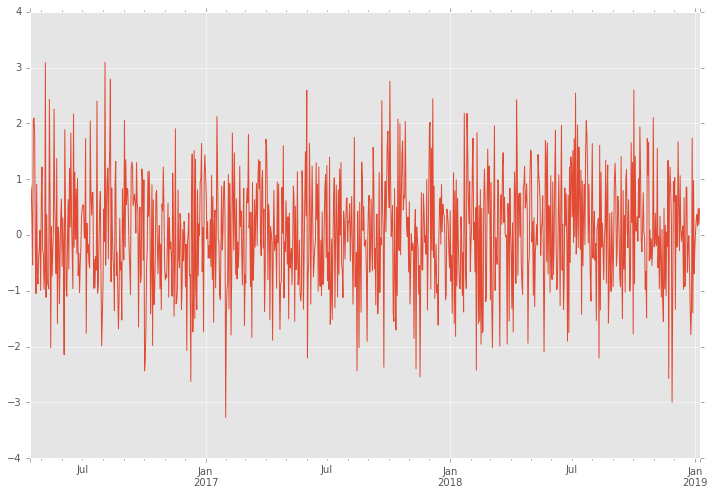

In [53]:
ts.plot(figsize=(12,8))

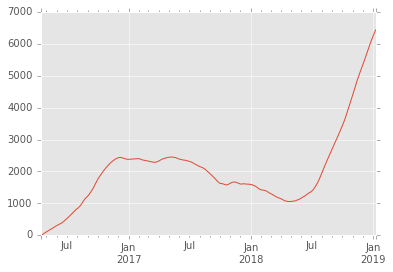

In [58]:
ts = ts.cumsum()
ts.plot()


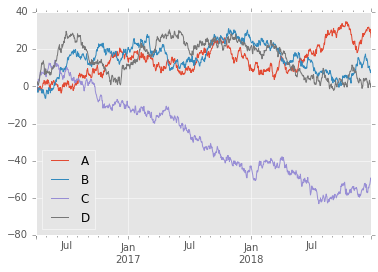

In [59]:
#plot通过标签很容易绘出所有字段
df = pd.DataFrame(np.random.randn(1000,4),
                  index=pd.date_range("20160401",periods=1000),
                 columns=["A","B","C","D"])

df = df.cumsum()
df.plot()

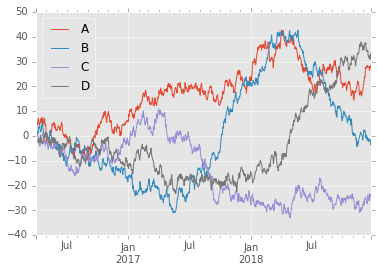

In [152]:
#plt.figure();df.plot();plt.legend(loc="best")

### 数据读入读出

In [63]:
#将数据以csv格式写入到csv文件里
pd.set_option("display.notebook_repr_html",True)
pd.set_option("display.max_columns",6)
pd.set_option("display.max_rows",10)
pd.set_option("display.width",78)
pd.set_option("precision",4)

df
df.to_csv("foo.csv")

In [64]:
#读入csv文件
pd.read_csv("foo.csv")

,Unnamed: 0,A,B,C,D
0,2016-04-01,-0.3118,0.8232,-0.2146,1.1814
1,2016-04-02,-0.6623,1.1066,0.3997,1.5629
2,2016-04-03,-1.3388,0.3407,0.2567,2.2855
3,2016-04-04,-1.8287,-2.8518,1.2188,2.5184
4,2016-04-05,-1.2470,-2.6942,1.3281,1.1024
...,...,...,...,...,...
995,2018-12-22,30.2756,8.7752,-52.7485,2.3956
996,2018-12-23,30.7548,8.7991,-51.5304,0.9264
997,2018-12-24,28.8414,7.3836,-50.1439,1.0571
998,2018-12-25,28.7948,8.7935,-49.1695,-0.4584


In [155]:
#以hd5格式保存
df.to_hdf("foo.h5","df")

In [65]:
pd.read_hdf("foo.h5","df")

,A,B,C,D
2016-04-01,1.5547,-0.2018,1.0031,-1.7883
2016-04-02,3.0110,0.7581,1.1641,-1.2602
2016-04-03,4.3292,-0.0247,0.3432,-2.2162
2016-04-04,4.6849,2.0171,0.5460,-2.2578
2016-04-05,4.8261,1.6511,0.4955,-2.2460
...,...,...,...,...
2018-12-22,27.3433,-1.8200,-24.2707,31.5355
2018-12-23,28.2265,-1.5171,-23.5878,30.9233
2018-12-24,27.7324,-2.2950,-23.9565,32.4785
2018-12-25,27.4052,-3.5878,-23.7618,33.2123


In [157]:
#保存为excel文件
df.to_excel("foo.xlsx",sheet_name="Sheet1")

In [66]:
pd.read_excel("foo.xlsx","Sheet1",index_col=None,na_values=["NA"])

,A,B,C,D
2016-04-01,1.5547,-0.2018,1.0031,-1.7883
2016-04-02,3.0110,0.7581,1.1641,-1.2602
2016-04-03,4.3292,-0.0247,0.3432,-2.2162
2016-04-04,4.6849,2.0171,0.5460,-2.2578
2016-04-05,4.8261,1.6511,0.4955,-2.2460
...,...,...,...,...
2018-12-22,27.3433,-1.8200,-24.2707,31.5355
2018-12-23,28.2265,-1.5171,-23.5878,30.9233
2018-12-24,27.7324,-2.2950,-23.9565,32.4785
2018-12-25,27.4052,-3.5878,-23.7618,33.2123
